In [1]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
from braket.aws import AwsDevice
from braket.ocean_plugin import BraketDWaveSampler
import networkx as nx
import dwave_networkx as dnx
from dwave.system.composites import EmbeddingComposite
from collections import defaultdict

In [ ]:
device = AwsDevice("arn:aws:braket:::device/qpu/d-wave/Advantage_system4")

In [103]:
n = 25
quartic = defaultdict(int)

for k1 in range(n):
    quartic[tuple(map(lambda x: str(x), sorted(set((k1,)))))] -= 1675 / n
    for k2 in range(n):
        quartic[tuple(map(lambda x: str(x), sorted(set(((k1,k2))))))] += 6700 / n**2
        for k3 in range(n):
            quartic[tuple(map(lambda x: str(x), sorted(set(((k1,k2,k3))))))] -= 10000 / n**3
            for k4 in range(n):
                quartic[tuple(map(lambda x: str(x), sorted(set((k1,k2,k3,k4)))))] += 5000 / n**4

    

In [104]:
quartic

defaultdict(int,
            {('0',): -56.9072,
             ('0', '1'): 17.77919999999999,
             ('0', '2'): 17.77919999999999,
             ('0', '3'): 17.77919999999999,
             ('0', '4'): 17.77919999999999,
             ('0', '5'): 17.77919999999999,
             ('0', '6'): 17.77919999999999,
             ('0', '7'): 17.77919999999999,
             ('0', '8'): 17.77919999999999,
             ('0', '9'): 17.77919999999999,
             ('0', '10'): 17.77919999999999,
             ('0', '11'): 17.77919999999999,
             ('0', '12'): 17.77919999999999,
             ('0', '13'): 17.77919999999999,
             ('0', '14'): 17.77919999999999,
             ('0', '15'): 17.77919999999999,
             ('0', '16'): 17.77919999999999,
             ('0', '17'): 17.77919999999999,
             ('0', '18'): 17.77919999999999,
             ('0', '19'): 17.77919999999999,
             ('0', '20'): 17.77919999999999,
             ('0', '21'): 17.77919999999999,
             ('0

In [ ]:
# debugging purposes
sampleset = dimod.ExactPolySolver().sample_hubo(quartic)
#sampleset = dimod.RandomSampler().sample(bqm=bqm, num_reads=1000)

In [ ]:
print(sampleset.lowest())
solution = sampleset.lowest().record['sample'][0]
print(sampleset.variables)
x = np.zeros(1)
for i in range(n):
    x += solution[i]
x /= n

print(f"x = {x}")

In [105]:
bqm = dimod.make_quadratic(quartic, 5, dimod.BINARY)
sampleset = dimod.RandomSampler().sample(bqm=bqm, num_reads=10000)

In [51]:
#from dwave.system import DWaveSampler
#sampler = DWaveSampler()
#sampleset = sampler.sample(bqm=bqm, num_reads=10000)

In [106]:
# reconstruct x from bqm
print(sampleset.lowest())
solution = sampleset.lowest().record['sample'][0]
print(sampleset.variables)
x = np.zeros(1)
i = 0
for var in sampleset.variables:
    if var == str(i):
        x += solution[i]
        i += 1
x /= n

print(f"x = {x}")

   0 0*1 0*10 0*11 0*13 0*14 0*16 0*19 0*2 0*21 0*22 ... 9*6  energy num_oc.
0  1   0    0    1    0    1    0    1   1    1    1 ...   1 -408.32       1
['BINARY', 1 rows, 1 samples, 325 variables]
Variables(['0', '0*1', '0*10', '0*11', '0*13', '0*14', '0*16', '0*19', '0*2', '0*21', '0*22', '0*3', '0*6', '0*9', '1', '1*11', '1*13', '1*14', '1*16', '1*19', '1*21', '1*22', '10', '10*1', '10*11', '10*13', '10*14', '10*16', '10*19', '10*21', '10*22', '10*3', '10*6', '11', '11*13', '11*14', '11*16', '12', '12*0', '12*1', '12*10', '12*11', '12*13', '12*14', '12*16', '12*19', '12*2', '12*21', '12*22', '12*23', '12*3', '12*6', '12*8', '12*9', '13', '13*14', '13*16', '14', '14*16', '15', '15*0', '15*1', '15*10', '15*11', '15*12', '15*13', '15*14', '15*16', '15*19', '15*2', '15*21', '15*22', '15*23', '15*3', '15*6', '15*8', '15*9', '16', '17', '17*0', '17*1', '17*10', '17*11', '17*12', '17*13', '17*14', '17*15', '17*16', '17*18', '17*19', '17*2', '17*20', '17*21', '17*22', '17*23', '17*24', '17

[]

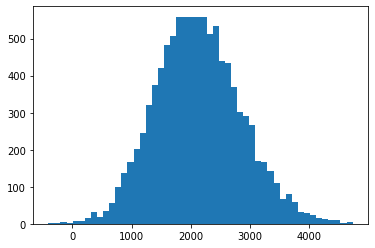

In [107]:
plt.hist(sampleset.record['energy'], bins=50)
plt.plot()